In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_squared_error
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn import preprocessing

In [2]:
params = { 'figure.figsize': (15.,5.),
          'axes.labelsize': 20,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'legend.fontsize': 14,
          'font.sans-serif': 'Arial'}
plt.rcParams.update(params)

In [3]:
colors = ["#377eb8", "#ff7f00", "#4daf4a"]

In [4]:
data = pd.read_csv("model_parameters.csv", index_col=0)

In [5]:
data

,param1,param2,vel,label
0,-513.944829,-41.834328,43774.395892,2
1,-454.781988,-27.489509,35481.064117,1
2,-458.602741,-35.104293,48044.153336,2
10,-648.160426,-40.667572,137744.677957,2
15,-507.741981,-36.639573,49594.549382,1
19,-342.108813,-19.046770,58268.378169,1
21,-308.677465,-28.082952,30355.487044,2
24,-641.249495,-36.817085,94429.511353,1
25,-446.048074,-26.539291,38021.150548,1
28,-508.368533,-35.920238,101139.779299,2


In [6]:
X = data.drop(['label'], axis=1)
y = data['label']

In [7]:
k = 5
kf = KFold(n_splits=k, shuffle=True)
for i in range(20):
    for train_fold, test_fold in kf.split(X):
        print(train_fold, test_fold)

[ 0  1  4  6  7  9 10 11 12 13 14 15 16 17 18 19] [2 3 5 8]
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 16 18] [10 15 17 19]
[ 1  2  3  4  5  6  7  8  9 10 11 13 15 16 17 19] [ 0 12 14 18]
[ 0  2  3  5  6  8 10 11 12 13 14 15 16 17 18 19] [1 4 7 9]
[ 0  1  2  3  4  5  7  8  9 10 12 14 15 17 18 19] [ 6 11 13 16]
[ 1  3  4  5  6  7  8 10 11 12 13 15 16 17 18 19] [ 0  2  9 14]
[ 0  1  2  4  5  6  7  8  9 11 13 14 15 16 17 19] [ 3 10 12 18]
[ 0  1  2  3  4  5  7  8  9 10 12 13 14 15 17 18] [ 6 11 16 19]
[ 0  2  3  5  6  7  8  9 10 11 12 14 15 16 18 19] [ 1  4 13 17]
[ 0  1  2  3  4  6  9 10 11 12 13 14 16 17 18 19] [ 5  7  8 15]
[ 0  1  2  3  4  5  7  9 11 12 14 15 16 17 18 19] [ 6  8 10 13]
[ 0  1  2  5  6  7  8  9 10 11 12 13 14 15 16 19] [ 3  4 17 18]
[ 1  2  3  4  6  8  9 10 12 13 14 15 16 17 18 19] [ 0  5  7 11]
[ 0  1  3  4  5  6  7  8 10 11 12 13 14 15 17 18] [ 2  9 16 19]
[ 0  2  3  4  5  6  7  8  9 10 11 13 16 17 18 19] [ 1 12 14 15]
[ 0  2  4  5  6  7  8  9 10 11 12 14 15 16 17 19

In [8]:
k = 5
kf = KFold(n_splits=k, shuffle=True)
model = LogisticRegression(penalty=None, max_iter=1000)

acc_score_ = []

for i in range(20):
    for train_fold, test_fold in kf.split(X):
        X_train , X_test = X.iloc[train_fold,:], X.iloc[test_fold,:]
        y_train , y_test = y.iloc[train_fold] , y.iloc[test_fold]
     
        model.fit(X_train,y_train)
        pred_values = model.predict(X_test)
        acc = accuracy_score(pred_values , y_test)
        acc_score_.append(acc)

In [9]:
np.mean(acc_score_), np.std(acc_score_)

(0.725, 0.2304886114323222)

In [10]:
logreg = LogisticRegression(penalty=None, max_iter=1000)
logreg.fit(X, y)

LogisticRegression(max_iter=1000, penalty=None)

/Users/irem/miniconda3/envs/brain/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/irem/miniconda3/envs/brain/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/irem/miniconda3/envs/brain/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


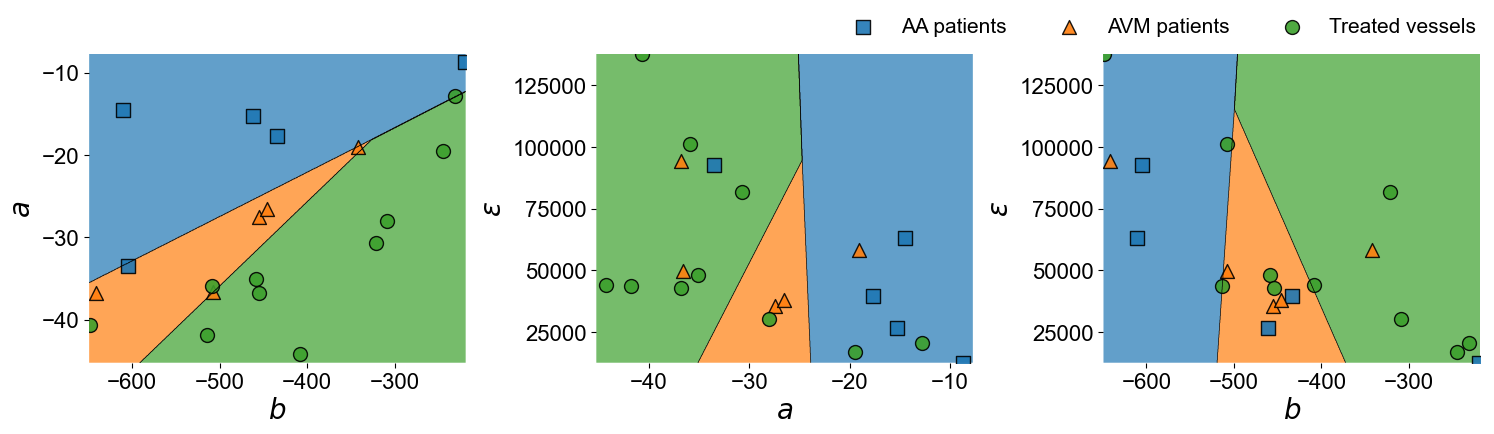

In [11]:
scatter_kwargs = {'s': 100,'alpha': 0.9}
contourf_kwargs = {'alpha': 0.7}

logreg = LogisticRegression(penalty=None, max_iter=1000)
logreg.fit(X, y)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

plot_decision_regions(np.array(X), np.array(y), clf=logreg, legend=0, ax=axs[0],
                      feature_index=[0,1],
                      filler_feature_values={2: np.mean(np.array(X)[:,2])}, 
                      filler_feature_ranges={2: np.mean(np.array(X)[:,2])*20},
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs)
axs[0].set_xlabel(r"$b$")
axs[0].set_ylabel(r"$a$")


plot_decision_regions(np.array(X), np.array(y), clf=logreg, legend=0, ax=axs[1],
                      feature_index=[1,2],
                      filler_feature_values={0: np.mean(np.array(X)[:,0])}, 
                      filler_feature_ranges={0: np.mean(np.abs(np.array(X))[:,0])*100},
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs)
axs[1].set_xlabel(r"$a$")
axs[1].set_ylabel(r"$\epsilon$")

plot_decision_regions(np.array(X), np.array(y), clf=logreg, legend=0, ax=axs[2],
                      feature_index=[0,2],
                      filler_feature_values={1: np.mean(np.array(X)[:,1])}, 
                      filler_feature_ranges={1: np.mean(np.abs(np.array(X))[:,1])*100},
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs)
axs[2].set_xlabel(r"$b$")
axs[2].set_ylabel(r"$\epsilon$") 


handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, ["AA patients", "AVM patients", "Treated vessels"], loc='upper right', bbox_to_anchor=(1,1.1), ncol=3, 
           frameon=False, fontsize=15)

fig.tight_layout()

#plt.savefig('../figures/classification_2d.pdf', format='pdf', bbox_inches='tight', transparent=True)